n = 1.3038209558204747 ± 0.0029767326506942625


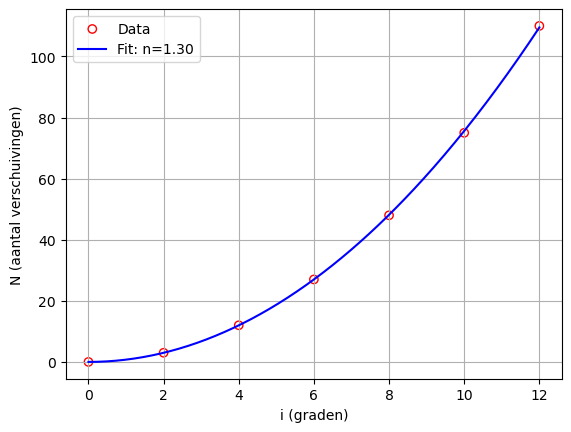

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Model
def N_model(i, n):
    lam = 532e-9   # golflengte (m)
    d   = 1e-3     # dikte (m)
    return (2 * n * d / lam) * (1/np.cos(i) - 1)

# Data
i_deg  = np.array([0, 2, 4, 6, 8, 10, 12])
i_rad  = np.deg2rad(i_deg)
N_data = np.array([0, 3, 12, 27, 48, 75, 110]) #(dit zijn test waardes, deze zullen vervangen worden door onze eigen meetresultaten)

# Eerste schatting
p0 = [1.5]

# Fit
popt, pcov = curve_fit(N_model, i_rad, N_data, p0=p0)
perr = np.sqrt(np.diag(pcov))

print("n =", popt[0], "±", perr[0])

# Plot
i_fit = np.linspace(0, np.deg2rad(12), 300)
plt.scatter(i_deg, N_data, facecolors='none', edgecolors='r', label="Data")
plt.plot(np.rad2deg(i_fit), N_model(i_fit, *popt), 'b-', label=f"Fit: n={popt[0]:.2f}")
plt.xlabel("i (graden)")
plt.ylabel("N (aantal verschuivingen)")
plt.legend()
plt.grid(True)
plt.show()


i =  0°  -->  N = 0.000
i =  2°  -->  N = 0.764
i =  4°  -->  N = 3.058
i =  6°  -->  N = 6.890
i =  8°  -->  N = 12.275
i = 10°  -->  N = 19.233
i = 12°  -->  N = 27.789


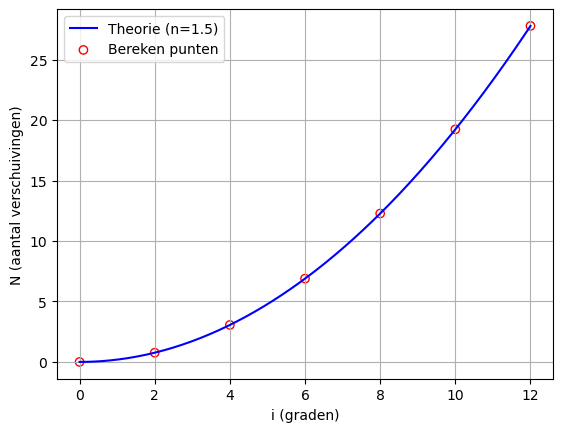

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
lam = 532e-9   # golflengte (m)
d   = 1e-3     # dikte (m)
n   = 1.5      # brekingsindex

# Model (met vaste lam, d, n)
def N_model(i):
    cos_i = np.cos(i)
    return (2 * d * (1 - cos_i) * (1 - n)) / (lam * ((1 - cos_i) - n))

# Hoeken in graden en radialen
i_deg = np.array([0, 2, 4, 6, 8, 10, 12])
i_rad = np.deg2rad(i_deg)

# Bereken N volgens de formule
N_vals = N_model(i_rad)

# Print de waarden
for deg, N in zip(i_deg, N_vals):
    print(f"i = {deg:2d}°  -->  N = {N:.3f}")

# Plot
i_fit = np.linspace(0, np.deg2rad(12), 300)
plt.plot(np.rad2deg(i_fit), N_model(i_fit), 'b-', label="Theorie (n=1.5)")
plt.scatter(i_deg, N_vals, facecolors='none', edgecolors='r', label="Bereken punten")
plt.xlabel("i (graden)")
plt.ylabel("N (aantal verschuivingen)")
plt.legend()
plt.grid(True)
plt.show()


i =  0°  -->  N = 0.000
i =  2°  -->  N = 1.526
i =  4°  -->  N = 6.101
i =  6°  -->  N = 13.709
i =  8°  -->  N = 24.325
i = 10°  -->  N = 37.914
i = 12°  -->  N = 54.432


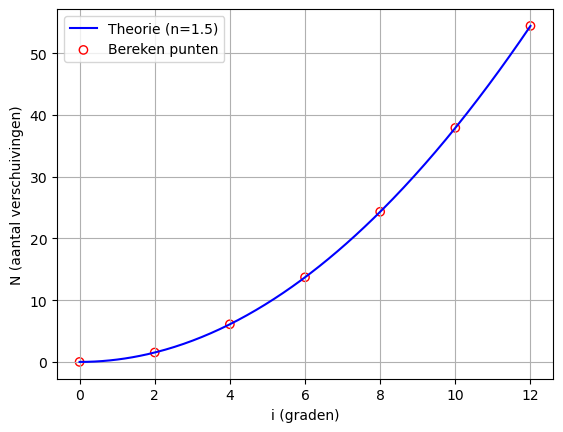

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
lam = 532e-9   # golflengte (m)
d   = 1e-3     # dikte (m)
n   = 1.5      # brekingsindex

# Correct model voor Michelson-interferometer
def N_model(i):
    return (2 * d / lam) * (n - np.sqrt(n**2 - np.sin(i)**2))

# Hoeken in graden en radialen
i_deg = np.array([0, 2, 4, 6, 8, 10, 12])
i_rad = np.deg2rad(i_deg)

# Bereken N volgens de formule
N_vals = N_model(i_rad)

# Print de waarden
for deg, N in zip(i_deg, N_vals):
    print(f"i = {deg:2d}°  -->  N = {N:.3f}")

# Plot
i_fit = np.linspace(0, np.deg2rad(12), 300)
plt.plot(np.rad2deg(i_fit), N_model(i_fit), 'b-', label="Theorie (n=1.5)")
plt.scatter(i_deg, N_vals, facecolors='none', edgecolors='r', label="Bereken punten")
plt.xlabel("i (graden)")
plt.ylabel("N (aantal verschuivingen)")
plt.legend()
plt.grid(True)
plt.show()
